In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [2]:
img = image.load_img("covid19/basedata/training/healthy/IM-0001-0001.jpeg")

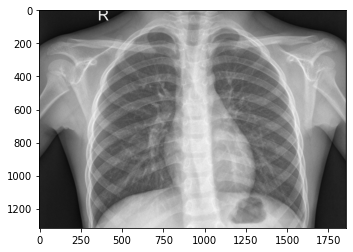

In [3]:
plt.imshow(img)

In [4]:
cv2.imread("covid19/basedata/training/healthy/IM-0001-0001.jpeg").shape

(1317, 1857, 3)

In [5]:
train = ImageDataGenerator(rescale= 1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory('covid19/basedata/training/',
                                         target_size = (1000,1000),
                                         batch_size = 5,
                                         class_mode = 'binary')

validation_dataset = train.flow_from_directory('covid19/basedata/validation/',
                                         target_size = (1000,1000),
                                         batch_size = 5,
                                         class_mode = 'binary')

Found 541 images belonging to 2 classes.
Found 541 images belonging to 2 classes.


In [7]:
train_dataset.class_indices

{'damaged': 0, 'healthy': 1}

In [8]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [9]:
model = tf.keras.models.Sequential([ tf.keras.layers.Conv2D(16, (3,3), activation = 'relu', input_shape = (1000,1000, 3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
                
                                   ])

In [10]:
model.compile(loss = 'binary_crossentropy',
             optimizer = RMSprop(learning_rate=0.001),
             metrics = ['accuracy'])

In [ ]:
model_fit = model.fit(train_dataset,
                     steps_per_epoch = 4,
                     epochs = 15,
                      validation_data = validation_dataset)

Epoch 1/15
4/4 [==============================] - 36s 11s/step - loss: 138.2182 - accuracy: 0.5000 - val_loss: 14.1684 - val_accuracy: 0.5675
Epoch 2/15
4/4 [==============================] - 34s 11s/step - loss: 15.9513 - accuracy: 0.5000 - val_loss: 7.5652 - val_accuracy: 0.4325
Epoch 3/15
4/4 [==============================] - 35s 11s/step - loss: 3.9440 - accuracy: 0.6000 - val_loss: 12.2472 - val_accuracy: 0.5675
Epoch 4/15
4/4 [==============================] - 35s 11s/step - loss: 8.1804 - accuracy: 0.5000 - val_loss: 0.2543 - val_accuracy: 0.9002
Epoch 5/15
4/4 [==============================] - 35s 11s/step - loss: 1.7646 - accuracy: 0.5000 - val_loss: 0.2800 - val_accuracy: 0.9057
Epoch 6/15
4/4 [==============================] - 35s 11s/step - loss: 0.3757 - accuracy: 0.9000 - val_loss: 0.4650 - val_accuracy: 0.8780
Epoch 7/15
4/4 [==============================] - 35s 11s/step - loss: 1.0293 - accuracy: 0.7000 - val_loss: 0.3106 - val_accuracy: 0.8872
Epoch 8/15
4/4 [======